In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df_kasparov = pd.read_csv('df_kasparov_limpio.csv')
df_kasparov['date_played'] = pd.to_datetime(df_kasparov['date_played'])
df_kasparov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   2128 non-null   int64         
 1   event        2128 non-null   object        
 2   site         2128 non-null   object        
 3   date_played  2128 non-null   datetime64[ns]
 4   white        2128 non-null   object        
 5   black        2128 non-null   object        
 6   result       2128 non-null   object        
 7   white_elo    2057 non-null   object        
 8   black_elo    1851 non-null   object        
 9   winner       2128 non-null   object        
 10  loser        2128 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 183.0+ KB


In [39]:
df_kasparov.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser
0,0,Wch U16,Wattignies,1976-08-27,"Chandler, Murray G","Kasparov, Gary",1-0,NaN,NaN,"Chandler, Murray G","Kasparov, Gary"
1,1,Wch U16,Wattignies,1976-01-01,"Kasparov, Gary","Galle, Andre",1-0,NaN,NaN,"Kasparov, Gary","Galle, Andre"
2,2,Wch U16,Wattignies,1976-01-01,"Kasparov, Gary","Grinberg, Nir",1/2-1/2,NaN,NaN,draw,draw
3,3,Wch U16,Wattignies,1976-01-01,"Roos, Louis","Kasparov, Gary",0-1,NaN,NaN,"Kasparov, Gary","Roos, Louis"
4,4,Wch U16,Wattignies,1976-01-01,"Van der Wiel, John TH","Kasparov, Gary",1-0,NaN,NaN,"Van der Wiel, John TH","Kasparov, Gary"


In [40]:
def resultado(value):
    name = 'Kasparov, Gary'
    name1 = 'Kasparov,G'  # aparece de las dos formas
    if value == name or value == name1:
        return 'Win'
    elif value == 'draw':
        return 'Draw'
    else:
        return 'Lose'

In [41]:
df_kasparov['resultado'] = df_kasparov['winner'].transform(resultado)
df_kasparov['resultado'].unique()

array(['Lose', 'Win', 'Draw'], dtype=object)

In [42]:
df_kasparov.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser,resultado
0,0,Wch U16,Wattignies,1976-08-27,"Chandler, Murray G","Kasparov, Gary",1-0,NaN,NaN,"Chandler, Murray G","Kasparov, Gary",Lose
1,1,Wch U16,Wattignies,1976-01-01,"Kasparov, Gary","Galle, Andre",1-0,NaN,NaN,"Kasparov, Gary","Galle, Andre",Win
2,2,Wch U16,Wattignies,1976-01-01,"Kasparov, Gary","Grinberg, Nir",1/2-1/2,NaN,NaN,draw,draw,Draw
3,3,Wch U16,Wattignies,1976-01-01,"Roos, Louis","Kasparov, Gary",0-1,NaN,NaN,"Kasparov, Gary","Roos, Louis",Win
4,4,Wch U16,Wattignies,1976-01-01,"Van der Wiel, John TH","Kasparov, Gary",1-0,NaN,NaN,"Van der Wiel, John TH","Kasparov, Gary",Lose


visctorias vs derrotas


C:\Users\franc\AppData\Local\Temp\ipykernel_9720\2779848401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_kasparov['resultado'].value_counts().index, y= df_kasparov['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10', order= ['Draw', 'Lose', 'Win'])


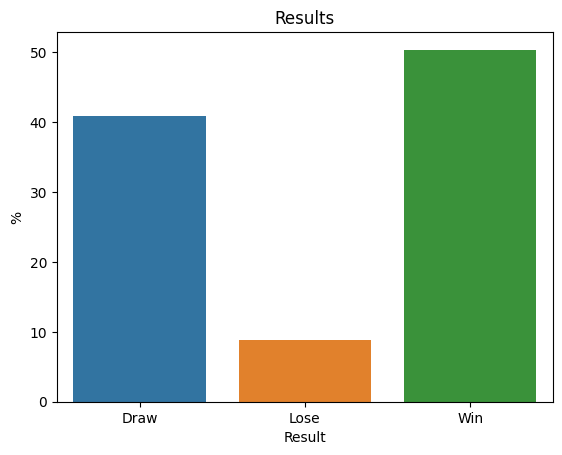

In [49]:
sns.barplot(x= df_kasparov['resultado'].value_counts().index, y= df_kasparov['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10', order= ['Draw', 'Lose', 'Win'])
plt.title('Results') 
plt.xlabel('Result')  
plt.ylabel('%')  
#plt.savefig('resultados_kasparov.png', transparent= True)

kasparov vs karpov

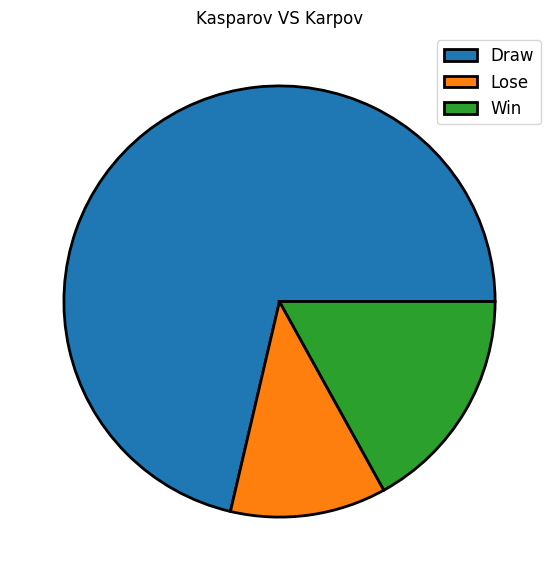

In [50]:
df_rival = df_kasparov[(df_kasparov['white'] == 'Karpov, Anatoly') | (df_kasparov['black'] == 'Karpov, Anatoly')]

res_kasparov_karpov = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_kasparov_karpov.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Kasparov VS Karpov')
plt.legend(res_kasparov_karpov.sort_index().index, loc= 'best', fontsize= 'large');
#plt.savefig('kasparov_vs_karpov_pie.png', transparent= True)

In [46]:
res_kasparov_karpov.sort_index()

resultado
Draw    122
Lose     20
Win      29
Name: count, dtype: int64

kasparov vs kramnik

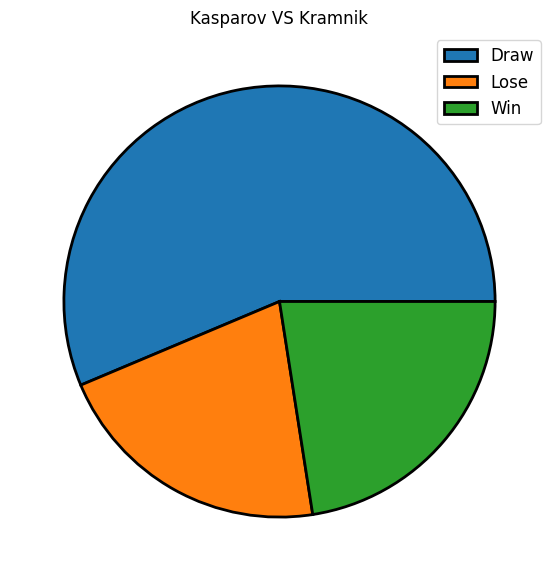

In [51]:
df_rival = df_kasparov[(df_kasparov['white'] == 'Kramnik, Vladimir') | (df_kasparov['black'] == 'Kramnik, Vladimir')]

res_kasparov_kramnik = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_kasparov_kramnik.sort_index(), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Kasparov VS Kramnik')
plt.legend(res_kasparov_kramnik.sort_index().index, loc= 'best', fontsize= 'large');
#plt.savefig('kasparov_vs_kramnick_pie.png', transparent= True)


In [48]:
res_kasparov_kramnik.sort_index()

resultado
Draw    40
Lose    15
Win     16
Name: count, dtype: int64